<a href="https://colab.research.google.com/github/y001003/pubg_project/blob/main/notebooks/pubg_EDA_PYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 및 라이브러리 불러오기

## 1_1 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = '/content/drive/MyDrive/project/pubg-finish-placement-prediction/train_V2.csv'
url2 = '/content/drive/MyDrive/project/pubg-finish-placement-prediction/test_V2.csv'
url3 = '/content/drive/MyDrive/project/pubg-finish-placement-prediction/sample_submission_V2.csv'
data1 = pd.read_csv(url)
data2 = pd.read_csv(url2)
data3 = pd.read_csv(url3)
train_df = pd.DataFrame(data1)
test_df = pd.DataFrame(data2)
sample = pd.DataFrame(data3)
sample

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [4]:
train_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


## 1_2 Column별 설명

|Column|Description|
|---|---|
|Id|아이디 Player’s Id|
|groupId|매치에 따라 주어진 플레이어 그룹에 아이디 ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.|
|matchId|매치에 주어진 아이디 ID to identify match. There are no matches that are in both the training and testing set.|
|assists|어시스트 Number of enemy players this player damaged that were killed by teammates.|
|boosts|부스트 아이템을 사용한 횟수 Number of boost items used.|
|damageDealt|상대에게 넣은 딜량 Total damage dealt. Note: Self inflicted damage is subtracted.|
|DBNOs|적군을 눕힌 횟수 Number of enemy players knocked.|
|headshotKills|헤드샷 킬 수 Number of enemy players killed with headshots.|
|heals|힐링 아이템을 사용한 횟수 Number of healing items used.|
|killPlace|적군을 죽인 수의 랭킹 Ranking in match of number of enemy players killed.|
|killPoints|랭킹에 근거한 킬 점수 Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.|
|kills|플레이어가 죽인 적군 수 Number of enemy players killed.|
|killStreaks|짧은 시간에 연속으로 죽인 가장 많은 킬 수 Max number of enemy players killed in a short amount of time.|
|longestKill|눕힌 적인 죽었을 때 가장 먼 거리 Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
|matchDuration|매치가 지속된 시간 초단위 Duration of match in seconds.|
|matchType|게임 모드 타입 String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.|
|maxPlace|꼴등의 등수 Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.|
|numGroups|게임에 참가한 그룹 수 Number of groups we have data for in the match.|
|rankPoints|랭킹 포인트, -1은 배치 첫판, Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.|
|revives|팀원을 되살린 횟수, Number of times this player revived teammates.|
|rideDistance|탈것을 타고 이동한 총 거리, Total distance traveled in vehicles measured in meters.|
|roadKills|탈것을 타고 죽인 킬수, Number of kills while in a vehicle.|
|swimDistance|수영을 한 거리, Total distance traveled by swimming measured in meters.|
|teamKills|팀킬을 한 횟수, Number of times this player killed a teammate.|
|vehicleDestroys|탈것을 파괴한 횟수, Number of vehicles destroyed.|
|walkDistance|걸어간 횟수, Total distance traveled on foot measured in meters.|
|weaponsAcquired|무기를 획득한 갯수,Number of weapons picked up. |
|winPoints|랭킹에 근거한 승리 점수, Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.|
|winPlacePerc|종속변수, 플레이어의 승리확률 값이 1일때 1등이다. maxPlace를 기준으로 삼는다. The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.|


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# 2. Data Preprocessing

## 2_1 결측치 제거


In [6]:
train_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
test_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [8]:
# 결측치 제거
train_df = train_df.loc[~train_df['winPlacePerc'].isnull()]

## 2_2 필요없는 컬럼 제거

In [9]:
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [10]:
train_df[['numGroups','maxPlace']]

,numGroups,maxPlace
0,26,28
1,25,26
2,47,50
3,30,31
4,95,97
...,...,...
4446961,28,29
4446962,93,93
4446963,28,28
4446964,25,26


In [21]:
pd.set_option('display.max_columns', 30)

In [23]:
# 고유값을 나타내는 Id 값들 삭제
useless = ['Id','groupId','matchId']
train_select = train_df.loc[:,~train_df.columns.isin(useless)]

# 3. EDA

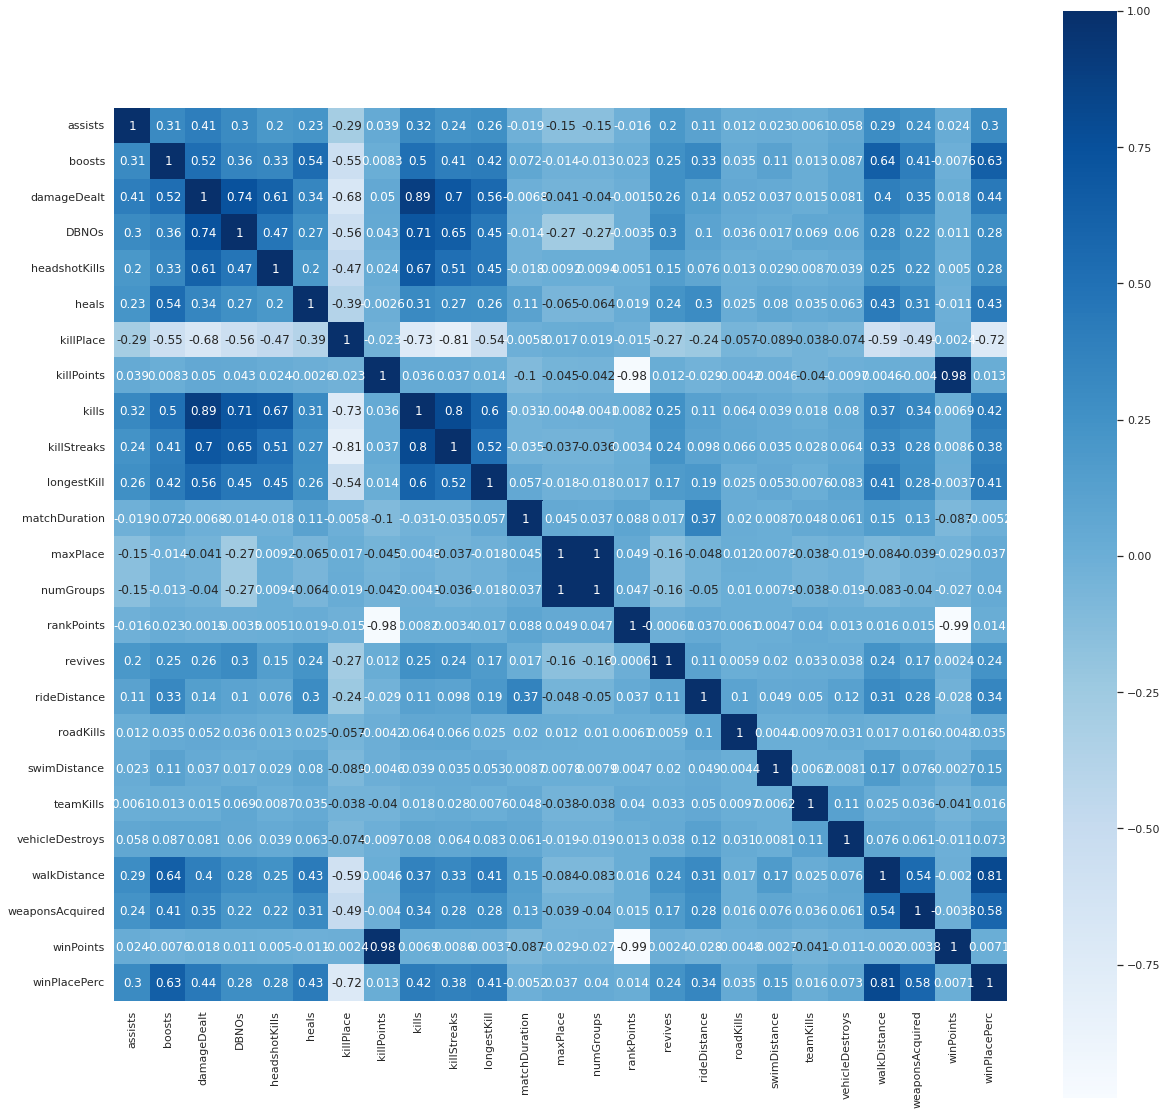

In [28]:
sns.set(rc={'figure.figsize':(15, 5)})
plt.figure(figsize=(20,20))
sns.heatmap(data=train_select.corr(),square=True,cmap="Blues",annot=True)

In [ ]:
from statsmodels

In [29]:
train_df[['rankPoints','winPoints','killPoints']]

,rankPoints,winPoints,killPoints
0,-1,1466,1241
1,1484,0,0
2,1491,0,0
3,1408,0,0
4,1560,0,0
...,...,...,...
4446961,-1,1507,1029
4446962,1501,0,0
4446963,1500,0,0
4446964,1418,0,0


In [20]:
train_df[train_df['matchId']== 'a10357fd1a4a91']['maxPlace'].value_counts()

28    96
Name: maxPlace, dtype: int64

# 4. Training

# 5. Test